## Siemens star

A Siemens star is a target used to test the resolution of a system see this [Wikipedia entry](https://en.wikipedia.org/wiki/Siemens_star).  This excersise was inspired by this [twitter post](https://twitter.com/RunningPhoton/status/1513049141055668225) and by [this Matlab example](https://github.com/jdmanton/rl_positivity_sim).  

The test images can be found [here](http://bigwww.epfl.ch/deconvolution/data/siemens-star/)

## Get and open test images

1.  Get images from this folder https://www.dropbox.com/sh/v3g5zln64e0uhk7/AABcYksPoawlTBO9ELCyqfPOa?dl=0
2.  In the code snippet below change ```im_path``` to the local location on your machine where you put the above folder

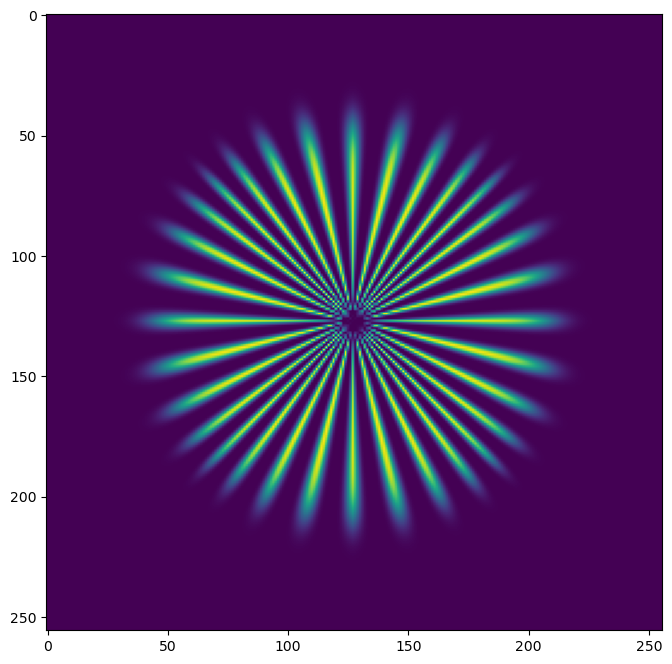

In [2]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d

input_name = "D:\\images\\tnia-python-images\\deconvolution\\sinuosidal siemens star\\ref.tif"
#input_name = "D:\\images\\tnia-python-images\\deconvolution\\wheel\\wheel.tif"

truth=imread(input_name)

truth=truth.astype('float32')

fig=imshow2d(truth, 8, 8)

In [3]:
from tnia.deconvolution.psfs import paraxial_psf



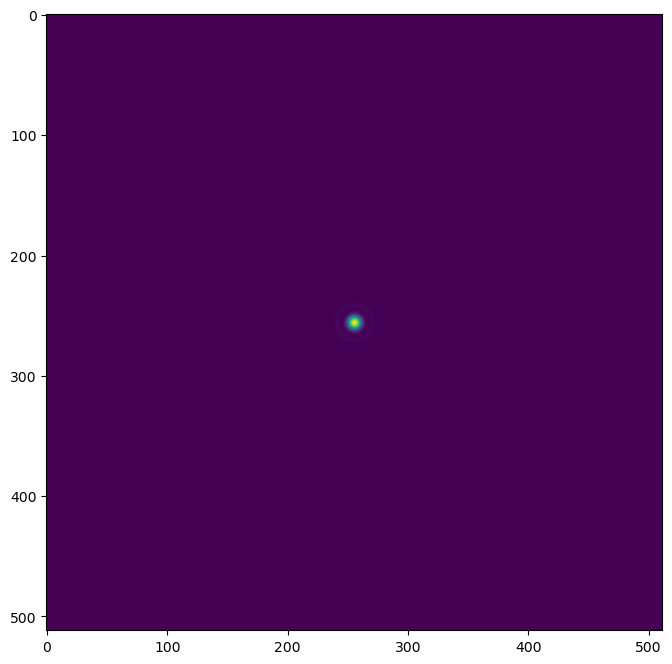

In [38]:
psf = paraxial_psf(truth.shape[0]*2, 0.5, 1.4, 0.02)

fig=imshow2d(psf, 8, 8)

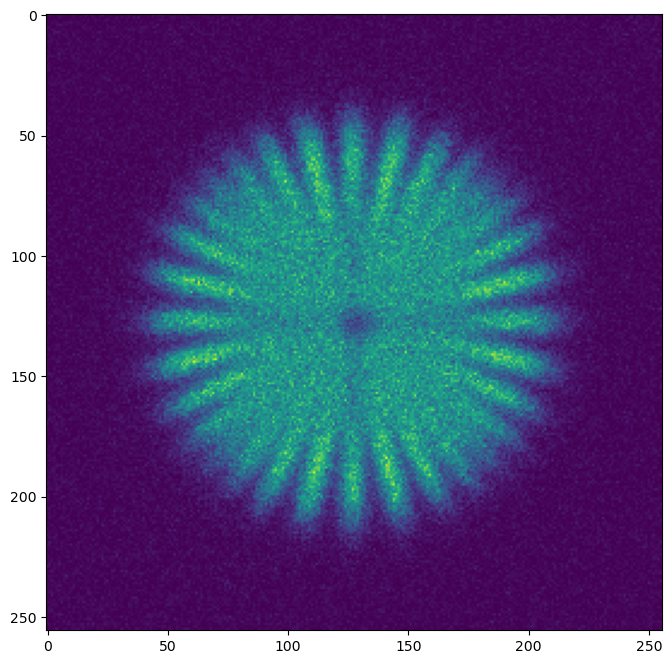

In [39]:
from tnia.deconvolution.forward import forward

gain = 100

background =1

img = forward(gain*truth, psf, background).astype('float32')

fig = imshow2d(img, 8, 8)

In [40]:
sizes = [101, 201, 301]

psfs = []

for size in sizes:
    psf_=paraxial_psf(size, 0.5, 1.4, 0.1)
    psf_[psf_<0]=0
    psf_/=psf_.sum()
    psfs.append(psf_)


0 10 
0.99999976 float32
0.0 0.23426889
0.0 60.0
7.2268754e-24 89.80874

0 10 
1.0 float32
0.0 0.23749055
0.0 60.0
8.55967e-23 91.03768

0 10 
1.0000001 float32
0.0 0.23860341
0.0 60.0
1.0759578e-22 91.53327


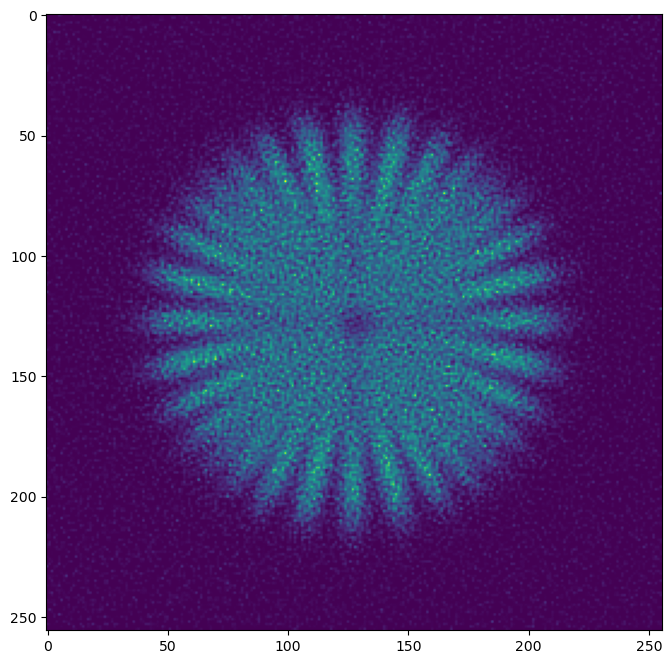

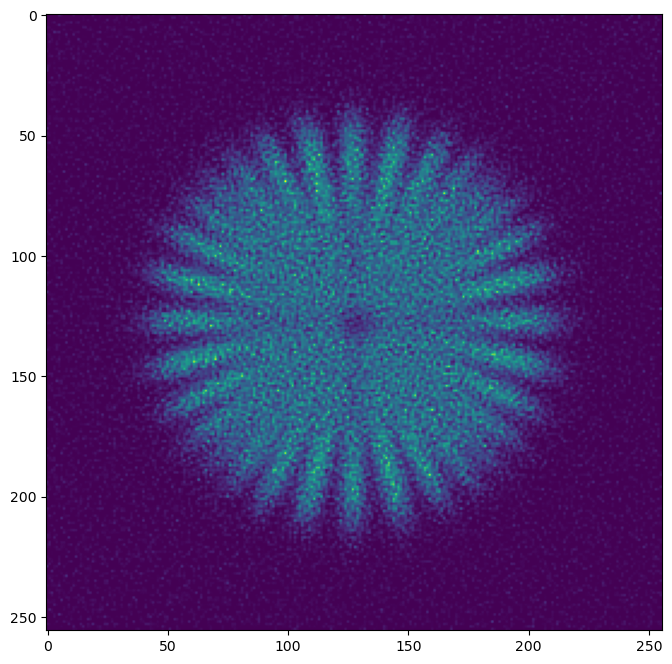

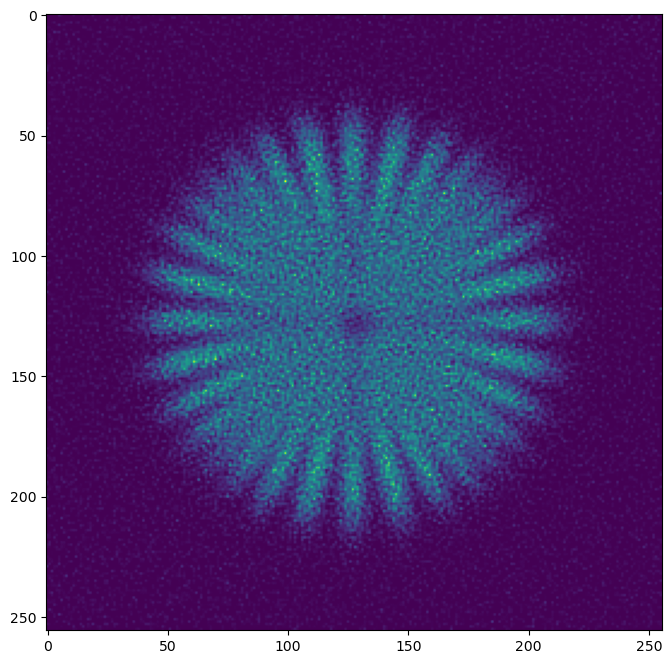

In [41]:
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp

decons = []

for psf in psfs:
    decon = richardson_lucy_cp(img, psf, 20, True)   
    print(psf.sum(), psf.dtype)
    print(psf.min(), psf.max())
    print(img.min(), img.max())
    print(decon.min(), decon.max()) 
    fig = imshow2d(decon, 8, 8)

In [14]:
img.dtype

dtype('int32')